<a href="https://colab.research.google.com/github/Kira-Stargazer/Enhancing-road-safety-with-AI-driven-traffic-accident-analysis-and-prediction/blob/main/Enhancing_road_safety_with_AI_driven_traffic_accident_analysis_and_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File 'Traffic_Accident_Prediction.ipynb' not found. Please ensure the file exists and is in the correct directory.
Accuracy: 0.2512666666666667

Classification Report:
               precision    recall  f1-score   support

           1       0.26      0.28      0.27      3779
           2       0.24      0.25      0.24      3656
           3       0.25      0.23      0.24      3793
           4       0.26      0.25      0.25      3772

    accuracy                           0.25     15000
   macro avg       0.25      0.25      0.25     15000
weighted avg       0.25      0.25      0.25     15000



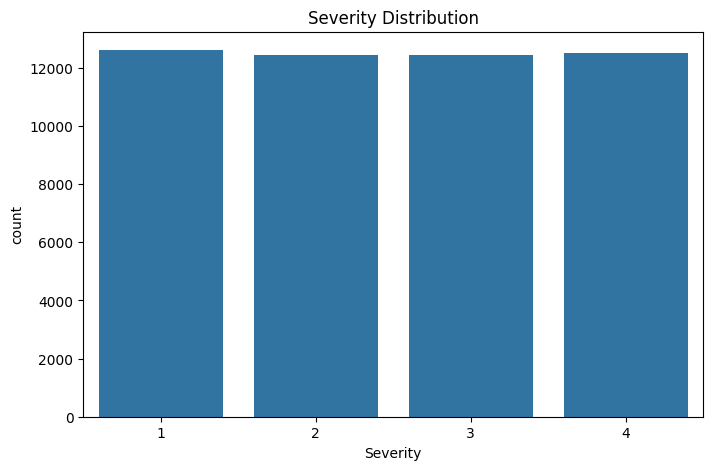

In [17]:
# Cell 1: Imports
import nbformat
import os  # Import the os module for file system operations

# Check if the file exists before attempting to open it
if os.path.exists("Traffic_Accident_Prediction.ipynb"):
    nb = nbformat.read("Traffic_Accident_Prediction.ipynb", as_version=nbformat.NO_CONVERT)
    for cell in nb.cells:
        if 'metadata' in cell and 'widgets' in cell['metadata']:
            del cell['metadata']['widgets']
    nbformat.write(nb, "Traffic_Accident_Prediction_cleaned.ipynb")
else:
    print("File 'Traffic_Accident_Prediction.ipynb' not found. Please ensure the file exists and is in the correct directory.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Cell 2: Simulate a large dataset
np.random.seed(42)
N = 50000  # Large dataset
data = {
    "Severity": np.random.choice([1, 2, 3, 4], N),
    "Temperature(F)": np.random.uniform(20, 100, N),
    "Humidity(%)": np.random.uniform(10, 100, N),
    "Visibility(mi)": np.random.uniform(0.5, 10, N),
    "Wind_Speed(mph)": np.random.uniform(0, 30, N),
    "Precipitation(in)": np.random.uniform(0, 2, N),
    "Weather_Condition": np.random.choice(["Clear", "Rain", "Snow", "Fog", "Cloudy"], N),
}

df = pd.DataFrame(data)

# Cell 3: Preprocessing
df["Weather_Condition"] = df["Weather_Condition"].astype("category").cat.codes

features = df.drop("Severity", axis=1)
target = df["Severity"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Cell 4: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Cell 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Cell 6: Plot
plt.figure(figsize=(8, 5))
sns.countplot(x="Severity", data=df)
plt.title("Severity Distribution")
plt.show()